In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("rounds_after_course_elim.csv")
df.columns

Index(['tour', 'year', 'season', 'event_completed', 'event_name', 'event_id',
       'player_name', 'dg_id', 'fin_text', 'round_num', 'course_name',
       'course_num', 'start_hole', 'teetime', 'round_score', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw', 'eagles_or_better', 'birdies',
       'pars', 'bogies', 'doubles_or_worse', 'calendar_year', 'date',
       'sg_categories', 'traditional_stats', 'par', 'yardage_4_5', 'yardage_3',
       'adj_par_3_score', 'adj_par_4_score', 'adj_par_5_score',
       'adj_driving_distance', 'adj_sd_distance', 'adj_driving_accuracy',
       'ott_sg', 'fw_width', 'fw_diff', 'rgh_diff', 'non_rgh_diff',
       'miss_fw_pen_frac', 'adj_gir', 'less_150_sg', 'greater_150_sg',
       'adj_penalties', 'adj_ob', 'arg_fairway_sg', 'arg_rough_sg',
       'arg_bunker_sg', 'less_5_ft_sg', 'greater_5_less_15_sg',
       'greater_15_sg', 'course', 'country'],
      dtype='object')

In [4]:
dropped_cols = df.iloc[:, 30:].columns
df = df.drop(columns=dropped_cols)

In [5]:
df.columns

Index(['tour', 'year', 'season', 'event_completed', 'event_name', 'event_id',
       'player_name', 'dg_id', 'fin_text', 'round_num', 'course_name',
       'course_num', 'start_hole', 'teetime', 'round_score', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw', 'eagles_or_better', 'birdies',
       'pars', 'bogies', 'doubles_or_worse'],
      dtype='object')

In [6]:
dropped_cols = ['tour', 'event_completed', 'event_name', 'event_id', 'round_num', 'teetime', 'start_hole', 'course_num', 'birdies', 'bogies', 'doubles_or_worse', 'round_score', 'pars', 'eagles_or_better']
df = df.drop(columns=dropped_cols)

In [7]:
avg = df.groupby(["season", "dg_id"]).mean(numeric_only=True).reset_index()

avg.head(30)

,season,dg_id,year,sg_putt,sg_arg,sg_app,sg_ott,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw
0,2024,44,2024.0,1.259500,-1.194500,-3.055500,-0.756500,271.950000,0.857000,0.333500,0.522500,71.098000,53.178000
1,2024,612,2024.0,-0.653500,-0.804000,-2.498500,-2.909000,272.300000,0.821500,0.472000,0.516500,70.777000,42.379500
2,2024,653,2024.0,-0.510750,-0.012750,-0.483750,-0.670500,288.575000,0.732250,0.611250,0.420500,62.348750,38.260750
3,2024,863,2024.0,-1.488000,-1.336500,-2.730000,-3.590000,249.600000,0.535500,0.305500,0.472500,72.587000,39.964000
4,2024,874,2024.0,-2.106000,0.355000,-4.934000,-0.879000,258.600000,0.571000,0.389000,0.357000,122.000000,57.450000
5,2024,915,2024.0,1.024500,-3.072000,-3.038000,-1.518500,248.600000,0.642500,0.333000,0.451000,96.791500,48.341000
6,2024,1480,2024.0,-3.378000,-0.377500,-2.420500,-1.323000,274.150000,0.571500,0.500000,0.540000,46.168500,32.362500
7,2024,1547,2024.0,-0.207750,-0.345000,0.332667,-0.930417,283.333333,0.595250,0.541833,0.453250,56.173167,40.418417
8,2024,3349,2024.0,0.016000,0.653500,-0.537000,-0.130250,293.600000,0.375000,0.653000,0.746250,63.437000,28.340750
9,2024,3485,2024.0,0.470750,0.620250,-0.039750,-1.479250,266.325000,0.785750,0.528000,0.604750,94.422000,40.496500


In [8]:
avg.to_csv("prePCA.csv", index=False)

In [9]:
avg.drop(columns=["year"], inplace=True)

df = avg.copy()

avg = avg[['season', 'dg_id', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'sg_putt']]

In [10]:
avg.dropna(inplace=True)

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

passthrough_cols = ['dg_id', 'season']
X = avg.drop(columns=passthrough_cols)

pre = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), X.columns)
    ],
    remainder='drop'
)

pipe = Pipeline(steps=[
    ('pre', pre),
    ('pca', PCA(n_components=2, random_state=0))
])

pcs = pipe.fit_transform(avg)
pc_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'], index=avg.index)

out = pd.concat([avg[passthrough_cols], pc_df], axis=1)


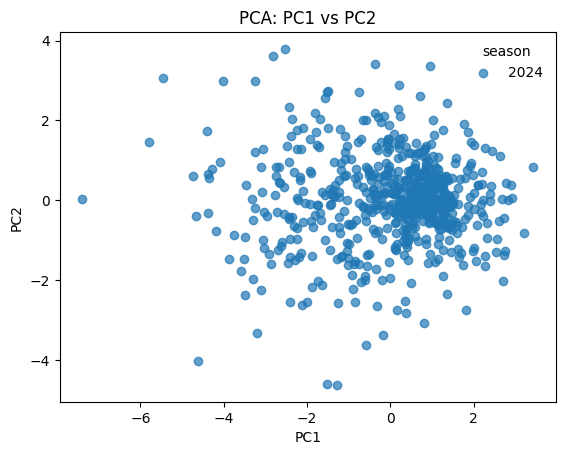

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for s, g in out.groupby('season'):
    ax.scatter(g['PC1'], g['PC2'], label=str(s), alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA: PC1 vs PC2')
ax.legend(title='season', frameon=False)
plt.show()

In [13]:
import numpy as np, pandas as pd

pca = pipe.named_steps['pca']
feat_cols = [c for c in avg.columns if c not in ['dg_id','season']]

# Loadings (feature contributions)
loadings = pd.DataFrame(pca.components_, 
                        columns=feat_cols, 
                        index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Top |loadings| for PC1:\n", loadings.loc['PC1', :].abs().sort_values(ascending=False).head(10))
print("Top |loadings| for PC2:\n", loadings.loc['PC2', :].abs().sort_values(ascending=False).head(10))
# print("Top |loadings| for PC3:\n", loadings.loc['PC3', :].abs().sort_values(ascending=False).head(10))


Xz = pipe.named_steps['pre'].transform(avg)
Xz = pd.DataFrame(Xz, columns=feat_cols, index=avg.index)
scores = pd.DataFrame(pcs, columns=['PC1','PC2'], index=avg.index)

corr_pc1 = Xz.corrwith(scores['PC1']).sort_values(key=np.abs, ascending=False).head(10)
corr_pc2 = Xz.corrwith(scores['PC2']).sort_values(key=np.abs, ascending=False).head(10)
# corr_pc3 = Xz.corrwith(scores['PC3']).sort_values(key=np.abs, ascending=False).head(10)
print("Strongest correlations with PC1:\n", corr_pc1)
print("Strongest correlations with PC2:\n", corr_pc2)
# print("Strongest correlations with PC3:\n", corr_pc3)

Explained variance ratio: [0.3504093  0.17445522]
Top |loadings| for PC1:
 gir             0.549059
prox_fw         0.493822
scrambling      0.393537
prox_rgh        0.385179
driving_dist    0.329098
sg_putt         0.185968
driving_acc     0.092466
Name: PC1, dtype: float64
Top |loadings| for PC2:
 sg_putt         0.705223
scrambling      0.513737
driving_dist    0.396574
prox_fw         0.171612
gir             0.158948
driving_acc     0.121774
prox_rgh        0.109181
Name: PC2, dtype: float64
Strongest correlations with PC1:
 gir             0.859916
prox_fw        -0.773406
scrambling      0.616343
prox_rgh       -0.603253
driving_dist    0.515420
sg_putt         0.291257
driving_acc     0.144816
dtype: float64
Strongest correlations with PC2:
 sg_putt         0.779322
scrambling      0.567717
driving_dist   -0.438244
prox_fw         0.189644
gir            -0.175649
driving_acc     0.134569
prox_rgh        0.120653
dtype: float64


In [14]:
out.head()

,dg_id,season,PC1,PC2
0,44,2024,-4.027681,2.995625
1,612,2024,-2.683059,0.823260
2,653,2024,-1.239911,-0.665933
3,863,2024,-4.741681,0.614116
4,874,2024,-7.396800,0.041895


In [15]:
merged_cols = [col for col in df.columns if col.startswith('sg_')]
merged_cols = merged_cols + ['dg_id', 'season']

out = out.merge(df[merged_cols], on=['dg_id', 'season'], how='inner')

In [16]:
out.head()

,dg_id,season,PC1,PC2,sg_putt,sg_arg,sg_app,sg_ott
0,44,2024,-4.027681,2.995625,1.25950,-1.19450,-3.05550,-0.7565
1,612,2024,-2.683059,0.823260,-0.65350,-0.80400,-2.49850,-2.9090
2,653,2024,-1.239911,-0.665933,-0.51075,-0.01275,-0.48375,-0.6705
3,863,2024,-4.741681,0.614116,-1.48800,-1.33650,-2.73000,-3.5900
4,874,2024,-7.396800,0.041895,-2.10600,0.35500,-4.93400,-0.8790


In [17]:
out.to_csv('PCA_output.csv', index=False)

In [18]:
dg_ids = [10091, 12294, 14139, 19841]

highlighted_players = ["DeChambeau, Bryson", "McIlroy, Rory", "Fleetwood, Tommy", "Thomas, Justin"]

out[out["dg_id"].isin(dg_ids)]

,dg_id,season,PC1,PC2,sg_putt,sg_arg,sg_app,sg_ott
83,10091,2024,1.496910,-0.036228,0.164658,0.180645,0.227039,0.740197
119,12294,2024,0.779839,0.648160,0.165333,0.225551,0.146833,0.287615
179,14139,2024,1.289165,-0.355800,-0.381474,0.486421,0.633789,0.188118
348,19841,2024,0.911441,0.035855,0.614857,0.529071,0.418714,1.393286


In [19]:
out.shape

(644, 8)